# **Title: Study and implementation of machine learning models for credit risk prediction using PyCaret**


# **Goal:**

Acquaintance with PyCaret's capabilities, review of PyCaret's various features in data preprocessing, feature selection, model training and performance evaluation.

# **Reference:**


 * https://archive.ics.uci.edu/dataset/144/statlog+german+credit+data

* https://pycaret.gitbook.io/docs

**This notebook includes the following sections:**

**1. classification- initalize:**

This dataset classifies individuals described by a set of characteristics as good or bad credit risks. Most of the data columns are categorical features that are automatically encoded in the model initialization phase using the (category_encoders.leave_one_out.LeaveOneOutEncoder) method. In this phase, we can set various parameters related to Data preparation, Scaling and Normalization, Feature engineering, Feature selection, and other aspects of the model, such as Model selection and Experiment Logging, to tailor it to the specific needs of the problem.

**2. Train:**

The compare_models function allows us to efficiently train and compare different models using the settings stored in the object from the previous step.Once we've identified the desired model based on the comparison results, we can use the create_model function to train that specific model with our preferred parameters.

**3. Optimize:**

At this stage, we can optimize our chosen model by using the tune_model function. For this project, we have used 'optuna', we have also used the ensemble_model functions to create the Boosting model, and we have used blend_models, stack_models, and calibrate_model.

**4. Analyze:**

PyCaret uses Yellowbrick for most of the mapping tasks. In this section, we have graphically displayed and analyzed the model with the help of the plot_model function. Using this function, we can draw various plots that are mentioned on the site for classification, regression and clustering problems.

**5. Evaluate model**

 displays a user interface for analyzing the performance of a trained model. It calls the plot_model function internally.

**6. Interpret model**

This function analyzes the predictions generated from a trained model. Most plots in this function are implemented based on the SHAP (Shapley Additive exPlanations)

**7. Predict model:**

Using the predict_model function predicts new and unseen data using a trained model. And the finalize_model function finalizes the trained model for deployment.

**8. Clustering:**

It includes the steps of creating a cluster object with data and training it with the create_model function. In this project, the 'kmeans' algorithm has been used, then we have used the functions evaluate_model, plot_model, assign_model and predict_model respectively to see the performance of the model.


**9. Anomaly detection:**

All the steps are the same as the previous part

**10. Save the model:**

This function saves the transformation pipeline and a trained model object into the current working directory as a pickle file for later use.

# **Result:**

**Rapid prototyping:** PyCaret enables quick experimentation with different algorithms and hyperparameters, facilitating rapid prototyping and model selection.

**Automated feature engineering:** It offers automated feature engineering techniques, such as feature creation, selection, and transformation, saving time and effort.

**Comprehensive evaluation metrics:** PyCaret provides a rich set of evaluation metrics to assess model performance from multiple perspectives.

**Model comparison:** It simplifies the comparison of different models, making it easy to identify the best-performing one.

**Extensibility:** PyCaret is highly customizable and can be extended with custom functions and modules.

# **Install dependencies and import necessary libraries**

In [ ]:
!pip install interpret-community


In [ ]:
!pip install pycaret[full] ucimlrepo

In [ ]:
import pycaret
print(pycaret.__version__)


3.3.2


In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from pycaret.classification import *
from ucimlrepo import fetch_ucirepo
# from google.colab import files
# uploaded = files.upload()

In [ ]:
# fetch dataset
statlog_german_credit_data = fetch_ucirepo(id=144)

# data (as pandas dataframes)
X = statlog_german_credit_data.data.features
y = statlog_german_credit_data.data.targets

In [ ]:
statlog_german_credit_data.data.features

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,Attribute11,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,Attribute20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,4,A121,31,A143,A152,1,A172,1,A191,A201
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,4,A122,40,A143,A152,1,A174,1,A192,A201
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,4,A123,38,A143,A152,1,A173,1,A191,A201
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,4,A124,23,A143,A153,1,A173,1,A192,A201


In [ ]:
# metadata
print(statlog_german_credit_data.metadata)

# variable information
print(statlog_german_credit_data.variables)

{'uci_id': 144, 'name': 'Statlog (German Credit Data)', 'repository_url': 'https://archive.ics.uci.edu/dataset/144/statlog+german+credit+data', 'data_url': 'https://archive.ics.uci.edu/static/public/144/data.csv', 'abstract': 'This dataset classifies people described by a set of attributes as good or bad credit risks. Comes in two formats (one all numeric). Also comes with a cost matrix', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1000, 'num_features': 20, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Other', 'Marital Status', 'Age', 'Occupation'], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1994, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5NC77', 'creators': ['Hans Hofmann'], 'intro_paper': None, 'additional_info': {'summary': 'Two datasets are provided.  the original dataset, in the form provided by

In [ ]:
# convert to pandas DataFrame
# df = pd.DataFrame(statlog_german_credit_data.data, columns=statlog_german_credit_data.feature_names)

# **1. Classification: Initialize**

In [ ]:
from pycaret.classification import ClassificationExperiment
exp = ClassificationExperiment()

In [ ]:
# init setup on exp
exp = setup(X, target = y, session_id = 123,
           fix_imbalance = True,
           fix_imbalance_method = 'smote',
           remove_outliers = False,
           outliers_method = 'ee',
           outliers_threshold = 0.05,
           normalize = True,
           normalize_method= 'minmax',
           transformation = True,
           transformation_method = 'yeo-johnson'
           feature_selection = True,
           remove_multicollinearity = True,
           multicollinearity_threshold = 0.3,
           pca = True,
           pca_method = 'linear',
           pca_components = 10,
           fold_strategy = 'kfold',
           fold = 5,
           low_variance_threshold = 0.1,
           random_state = 123,
           log_plots = True,
           log_experiment = True,
           experiment_name = 'Statlog (German Credit Data)',


           )

,Description,Value
0,Session id,123
1,Target,Attribute20
2,Target type,Binary
3,Target mapping,"A201: 0, A202: 1"
4,Original data shape,"(1000, 20)"
5,Transformed data shape,"(1648, 4)"
6,Transformed train set shape,"(1348, 4)"
7,Transformed test set shape,"(300, 4)"
8,Numeric features,7
9,Categorical features,12


In [ ]:
# check available models
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [ ]:
# get X_train
get_config('X_train')

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,Attribute11,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19
286,A11,48,A32,A41,4788,A61,A74,4,A93,A101,3,A122,26,A143,A152,1,A173,2,A191
532,A14,12,A33,A41,1503,A61,A73,4,A94,A101,4,A121,41,A143,A151,1,A173,1,A191
226,A12,48,A32,A43,10961,A64,A74,1,A93,A102,2,A124,27,A141,A152,2,A173,1,A192
552,A11,48,A32,A43,6999,A61,A74,1,A94,A103,1,A121,34,A143,A152,2,A173,1,A192
697,A14,12,A34,A40,926,A61,A71,1,A92,A101,2,A122,38,A143,A152,1,A171,1,A191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,A14,12,A32,A43,2171,A61,A72,2,A92,A101,2,A123,29,A141,A152,1,A173,1,A191
304,A14,48,A34,A40,10127,A63,A73,2,A93,A101,2,A124,44,A141,A153,1,A173,1,A191
723,A12,9,A32,A43,790,A63,A73,4,A92,A101,3,A121,66,A143,A152,1,A172,1,A191
326,A14,12,A34,A42,5801,A65,A75,2,A93,A101,4,A122,49,A143,A151,1,A173,1,A192


In [ ]:
# get metrics
get_metrics()

,Name,Display Name,Score Function,Scorer,Target,Args,Greater is Better,Multiclass,Custom
ID,,,,,,,,,
acc,Accuracy,Accuracy,<function accuracy_score at 0x7b58851fff40>,accuracy,pred,{},True,True,False
auc,AUC,AUC,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(roc_auc_score, response_method=('d...",pred_proba,"{'average': 'weighted', 'multi_class': 'ovr'}",True,True,False
recall,Recall,Recall,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(recall_score, response_method='pre...",pred,{'average': 'weighted'},True,True,False
precision,Precision,Prec.,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(precision_score, response_method='...",pred,{'average': 'weighted'},True,True,False
f1,F1,F1,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(f1_score, response_method='predict...",pred,{'average': 'weighted'},True,True,False
kappa,Kappa,Kappa,<function cohen_kappa_score at 0x7b588526c310>,"make_scorer(cohen_kappa_score, response_method...",pred,{},True,True,False
mcc,MCC,MCC,<function matthews_corrcoef at 0x7b588526c550>,"make_scorer(matthews_corrcoef, response_method...",pred,{},True,True,False


In [ ]:

# check ML logs
get_logs()

,run_id,experiment_id,status,artifact_uri,start_time,end_time,params.Encoding method,params.Feature selection estimator,params.Target,params.Feature selection method,...,params.Fold Generator,tags.Run Time,tags.mlflow.source.name,tags.Source,tags.URI,tags.mlflow.runName,tags.mlflow.source.type,tags.USI,tags.Run ID,tags.mlflow.user
0,11494134efef45f69a661c8725fe2ada,151492395780336168,RUNNING,file:///content/mlruns/151492395780336168/1149...,2024-10-02 08:59:49.794000+00:00,None,None,lightgbm,Attribute20,classic,...,KFold,8.36,/usr/local/lib/python3.10/dist-packages/colab_...,setup,61433688,Session Initialized dcd5,LOCAL,dcd5,11494134efef45f69a661c8725fe2ada,root


# **2.Train**

**2-1:compare_models**

In [ ]:
best_model = exp.compare_models(n_select = 3,sort = 'F1')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dummy,Dummy Classifier,0.9629,0.5000,0.9629,0.9273,0.9447,0.0000,0.0000,0.4120
et,Extra Trees Classifier,0.8471,0.4944,0.8471,0.9308,0.8851,0.0170,0.0145,0.6200
catboost,CatBoost Classifier,0.8457,0.5541,0.8457,0.9298,0.8842,0.0077,0.0135,2.7840
rf,Random Forest Classifier,0.8400,0.5325,0.8400,0.9285,0.8800,0.0057,-0.0004,0.6720
xgboost,Extreme Gradient Boosting,0.8286,0.5851,0.8286,0.9297,0.8739,0.0101,0.0091,0.7560
lightgbm,Light Gradient Boosting Machine,0.8257,0.5559,0.8257,0.9300,0.8728,0.0103,0.0024,0.8060
dt,Decision Tree Classifier,0.8171,0.5324,0.8171,0.9335,0.8672,0.0382,0.0431,0.7480
gbc,Gradient Boosting Classifier,0.7729,0.5825,0.7729,0.9299,0.8398,0.0145,0.0230,0.5940
ada,Ada Boost Classifier,0.7671,0.6035,0.7671,0.9347,0.8372,0.0384,0.0644,0.7200
knn,K Neighbors Classifier,0.7343,0.4870,0.7343,0.9266,0.8158,-0.0131,-0.0235,0.4300


Processing:   0%|          | 0/71 [00:00<?, ?it/s]

2024/10/02 10:35:58 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/02 10:35:59 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


2024/10/02 10:36:05 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/02 10:36:05 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/02 10:36:06 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/02 10:36:06 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/02 10:36:06 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/02 10:36:07 

In [ ]:
print(best_model)

[DummyClassifier(constant=None, random_state=123, strategy='prior'), ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False), <catboost.core.CatBoostClassifier object at 0x7a1b7b4323b0>]


 **2-2:create_model**

In [ ]:
# train decision tree
dt = create_model('dt', max_depth = 5, fold=5, random_state = 123)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9500,0.4600,0.9500,0.9293,0.9396,-0.0208,-0.0232
1,0.9643,0.4993,0.9643,0.9298,0.9468,0.0000,0.0000
2,0.9286,0.6941,0.9286,0.9404,0.9343,0.1304,0.1325
3,0.9571,0.8481,0.9571,0.9296,0.9432,-0.0120,-0.0163
4,0.9429,0.7071,0.9429,0.9327,0.9374,0.1716,0.1754
Mean,0.9486,0.6417,0.9486,0.9324,0.9402,0.0538,0.0537
Std,0.0123,0.1435,0.0123,0.0042,0.0044,0.0807,0.0833


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
# see models params
print(dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=123, splitter='best')


In [ ]:
# access the scoring grid
dt_results = pull()
print(dt_results)

      Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.6071  0.4194  0.6071  0.8756  0.7070 -0.0126 -0.0207
1       0.7000  0.6222  0.7000  0.9368  0.7943  0.0249  0.0453
2       0.5000  0.6066  0.5000  0.9583  0.6404  0.0262  0.0809
3       0.8500  0.7574  0.8500  0.9488  0.8945  0.0417  0.0572
4       0.7500  0.5496  0.7500  0.9546  0.8333  0.0541  0.0990
Mean    0.6814  0.5910  0.6814  0.9348  0.7739  0.0269  0.0524
Std     0.1199  0.1096  0.1199  0.0305  0.0903  0.0225  0.0410


In [ ]:
# check type
type(dt_results)


# select only Mean
dt_results.loc[['Mean']]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
Mean,0.6814,0.591,0.6814,0.9348,0.7739,0.0269,0.0524


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6357,0.5051,0.6357,0.8688,0.7283,-0.0390,-0.0593
1,0.6500,0.4956,0.6500,0.9343,0.7588,0.0115,0.0232
2,0.6286,0.6719,0.6286,0.9617,0.7468,0.0531,0.1283
3,0.8000,0.7408,0.8000,0.9470,0.8645,0.0180,0.0284
4,0.7714,0.5165,0.7714,0.9459,0.8467,0.0088,0.0149
Mean,0.6971,0.5860,0.6971,0.9315,0.7890,0.0105,0.0271
Std,0.0732,0.1009,0.0732,0.0325,0.0555,0.0294,0.0598


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

2024/10/02 09:04:28 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6929,0.4996,0.6929,0.8655,0.7674,-0.0651,-0.0876
1,0.6571,0.5400,0.6571,0.9245,0.7645,-0.0260,-0.0500
2,0.5071,0.4917,0.5071,0.9586,0.6467,0.0274,0.0833
3,0.8357,0.7574,0.8357,0.9483,0.8861,0.0336,0.0480
4,0.7143,0.5947,0.7143,0.9534,0.8094,0.0411,0.0813
Mean,0.6814,0.5767,0.6814,0.9301,0.7748,0.0022,0.0150
Std,0.1058,0.0974,0.1058,0.0343,0.0776,0.0411,0.0706


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

2024/10/02 09:04:33 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7214,0.4784,0.7214,0.8684,0.7862,-0.0573,-0.0733
1,0.6643,0.5548,0.6643,0.9249,0.7695,-0.0249,-0.0474
2,0.5286,0.5037,0.5286,0.9592,0.6656,0.0310,0.0907
3,0.8429,0.7482,0.8429,0.9486,0.8903,0.0375,0.0525
4,0.7429,0.5597,0.7429,0.9543,0.8286,0.0512,0.0953
Mean,0.7000,0.5690,0.7000,0.9311,0.7880,0.0075,0.0236
Std,0.1033,0.0947,0.1033,0.0335,0.0741,0.0415,0.0706


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

2024/10/02 09:04:38 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7214,0.4987,0.7214,0.8684,0.7862,-0.0573,-0.0733
1,0.6929,0.5867,0.6929,0.9365,0.7894,0.0227,0.0420
2,0.5286,0.5147,0.5286,0.9592,0.6656,0.0310,0.0907
3,0.8643,0.7169,0.8643,0.9403,0.9007,-0.0472,-0.0594
4,0.8500,0.5331,0.8500,0.9488,0.8945,0.0417,0.0572
Mean,0.7314,0.5700,0.7314,0.9307,0.8073,-0.0018,0.0114
Std,0.1220,0.0792,0.1220,0.0321,0.0862,0.0418,0.0656


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

2024/10/02 09:04:45 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


<Axes: >

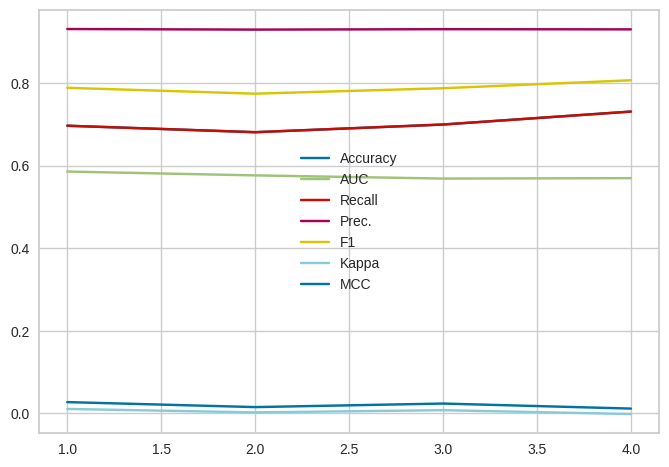

In [ ]:
# start a loop
models = []
results = []

for i in range(3,7):
    model = create_model('rf', max_depth = i)
    model_results = pull().loc[['Mean']]
    models.append(model)
    results.append(model_results)

results = pd.concat(results, axis=0)
results.index = range(1, len(results)+1)
results.plot()

# **3. Optimize**

**3-1: tune_model**

In [ ]:
# tune model
tuned_dt = tune_model(dt, search_library = 'optuna' ,choose_better = True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8714,0.4741,0.8714,0.8835,0.8774,0.0315,0.0317
1,0.8286,0.5170,0.8286,0.9336,0.8759,0.0204,0.0269
2,0.7857,0.7316,0.7857,0.9557,0.8563,0.0708,0.1194
3,0.9000,0.5616,0.9000,0.9510,0.9235,0.0858,0.1006
4,0.8000,0.3713,0.8000,0.9379,0.8635,-0.0515,-0.0780
Mean,0.8371,0.5311,0.8371,0.9323,0.8793,0.0314,0.0401
Std,0.0430,0.1184,0.0430,0.0257,0.0234,0.0480,0.0695


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

INFO:optuna_integration.sklearn.sklearn:Searching the best hyperparameters using 700 samples...
INFO:optuna_integration.sklearn.sklearn:Finished hyperparameter search!


2024/10/02 09:05:50 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [ ]:
print(tuned_dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=16, max_features=0.8287017255845774,
                       max_leaf_nodes=None,
                       min_impurity_decrease=1.46909767753943e-06,
                       min_samples_leaf=2, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, monotonic_cst=None,
                       random_state=123, splitter='best')


**3-2: ensemble_model**





In [ ]:
# ensemble model
boosted_dt = ensemble_model(dt, method = 'Boosting', n_estimators = 100, fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8643,0.5471,0.8643,0.8826,0.8732,0.0235,0.0238
1,0.8714,0.7267,0.8714,0.9358,0.9011,0.0491,0.0578
2,0.7500,0.5423,0.7500,0.9546,0.8333,0.0541,0.0990
3,0.8643,0.7151,0.8643,0.9403,0.9007,-0.0472,-0.0594
4,0.8357,0.5037,0.8357,0.9393,0.8845,-0.0495,-0.0680
Mean,0.8371,0.6070,0.8371,0.9305,0.8786,0.0060,0.0106
Std,0.0453,0.0943,0.0453,0.0248,0.0250,0.0456,0.0653


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

2024/10/02 09:06:26 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


**3-3: blend_models**

In [ ]:
# train a few models
lr = create_model('lr')
rf = create_model('rf')
knn = create_model('knn')

# blend models
blender = blend_models([lr, rf, knn], method = 'hard')
# blender = blend_models(compare_models(n_select = 3))

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4714,0.6209,0.4714,0.9107,0.5853,0.0494,0.1129
1,0.6357,0.4637,0.6357,0.9231,0.7490,-0.0288,-0.0579
2,0.6357,0.7702,0.6357,0.9735,0.7511,0.0870,0.2132
3,0.6214,0.6581,0.6214,0.9502,0.7426,0.0180,0.0429
4,0.6214,0.4651,0.6214,0.9502,0.7426,0.0180,0.0429
Mean,0.5971,0.5956,0.5971,0.9415,0.7141,0.0287,0.0708
Std,0.0632,0.1179,0.0632,0.0222,0.0645,0.0384,0.0896


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

2024/10/02 09:20:49 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8571,0.5165,0.8571,0.8817,0.8690,0.0162,0.0165
1,0.8500,0.5904,0.8500,0.9438,0.8906,0.1091,0.1414
2,0.7714,0.7270,0.7714,0.9648,0.8475,0.1125,0.2028
3,0.8714,0.5487,0.8714,0.9406,0.9047,-0.0465,-0.0572
4,0.8643,0.4881,0.8643,0.9494,0.9029,0.0514,0.0675
Mean,0.8429,0.5741,0.8429,0.9361,0.8829,0.0485,0.0742
Std,0.0364,0.0837,0.0364,0.0284,0.0218,0.0598,0.0913


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

2024/10/02 09:20:56 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7643,0.6132,0.7643,0.8818,0.8156,0.0120,0.0146
1,0.7214,0.6163,0.7214,0.9378,0.8089,0.0319,0.0556
2,0.6786,0.4476,0.6786,0.9420,0.7850,-0.0103,-0.0212
3,0.7714,0.3088,0.7714,0.9367,0.8461,-0.0526,-0.0857
4,0.7857,0.4605,0.7857,0.9373,0.8549,-0.0521,-0.0819
Mean,0.7443,0.4893,0.7443,0.9272,0.8221,-0.0142,-0.0237
Std,0.0392,0.1154,0.0392,0.0227,0.0254,0.0339,0.0548


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

2024/10/02 09:21:03 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8000,0.0000,0.8000,0.8853,0.8381,0.0359,0.0410
1,0.7786,0.0000,0.7786,0.9311,0.8454,0.0000,0.0000
2,0.7214,0.0000,0.7214,0.9637,0.8140,0.0857,0.1723
3,0.8286,0.0000,0.8286,0.9390,0.8804,-0.0500,-0.0700
4,0.8071,0.0000,0.8071,0.9472,0.8689,0.0207,0.0320
Mean,0.7871,0.0000,0.7871,0.9333,0.8494,0.0185,0.0350
Std,0.0365,0.0000,0.0365,0.0263,0.0234,0.0444,0.0789


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

2024/10/02 09:21:10 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [ ]:
print(blender)

VotingClassifier(estimators=[('Logistic Regression',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=1000,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=123,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('Random Forest Classifier',
                              RandomForestClassifier(bootstrap=Tru...
                                                     min_weight_fraction_leaf=0.0,
                                                     monotonic

**3-4: stack_models**

In [ ]:
# train a few models
lr = create_model('lr')
dt = create_model('dt')
knn = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4714,0.6209,0.4714,0.9107,0.5853,0.0494,0.1129
1,0.5643,0.4667,0.5643,0.9179,0.6944,-0.0364,-0.0837
2,0.5429,0.4118,0.5429,0.9345,0.6818,-0.0247,-0.0666
3,0.6214,0.6581,0.6214,0.9502,0.7426,0.0180,0.0429
4,0.6214,0.4651,0.6214,0.9502,0.7426,0.0180,0.0429
Mean,0.5643,0.5245,0.5643,0.9327,0.6893,0.0049,0.0097
Std,0.0559,0.0967,0.0559,0.0162,0.0576,0.0313,0.0740


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

2024/10/02 09:22:30 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8643,0.5653,0.8643,0.8929,0.8777,0.1038,0.1068
1,0.8500,0.6333,0.8500,0.9438,0.8906,0.1091,0.1414
2,0.8286,0.4265,0.8286,0.9390,0.8804,-0.0500,-0.0700
3,0.8714,0.4485,0.8714,0.9406,0.9047,-0.0465,-0.0572
4,0.8000,0.5331,0.8000,0.9470,0.8645,0.0180,0.0284
Mean,0.8429,0.5213,0.8429,0.9327,0.8836,0.0269,0.0299
Std,0.0260,0.0760,0.0260,0.0201,0.0134,0.0693,0.0848


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

2024/10/02 09:22:35 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7643,0.6132,0.7643,0.8818,0.8156,0.0120,0.0146
1,0.7143,0.5607,0.7143,0.9278,0.8039,-0.0163,-0.0281
2,0.7357,0.5983,0.7357,0.9445,0.8238,0.0000,0.0000
3,0.7929,0.2684,0.7929,0.9376,0.8592,-0.0518,-0.0800
4,0.7643,0.4283,0.7643,0.9456,0.8422,0.0069,0.0118
Mean,0.7543,0.4938,0.7543,0.9275,0.8289,-0.0099,-0.0163
Std,0.0270,0.1302,0.0270,0.0237,0.0196,0.0230,0.0352


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

2024/10/02 09:22:39 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [ ]:
meta_model = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8500,0.5742,0.8500,0.8809,0.8648,0.0094,0.0097
1,0.8357,0.6489,0.8357,0.9430,0.8819,0.0955,0.1284
2,0.7429,0.4173,0.7429,0.9354,0.8281,-0.0535,-0.0934
3,0.8500,0.5110,0.8500,0.9398,0.8927,-0.0485,-0.0638
4,0.8571,0.5294,0.8571,0.9491,0.8987,0.0463,0.0622
Mean,0.8271,0.5362,0.8271,0.9297,0.8732,0.0098,0.0086
Std,0.0427,0.0761,0.0427,0.0248,0.0253,0.0567,0.0811


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

2024/10/02 09:23:52 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [ ]:
# stack models
stacker = stack_models([lr, dt, knn], meta_model = meta_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8714,0.5946,0.8714,0.9037,0.8860,0.1845,0.1917
1,0.8000,0.6081,0.8000,0.9322,0.8587,0.0076,0.0108
2,0.7857,0.8061,0.7857,0.9651,0.8568,0.1221,0.2130
3,0.8714,0.2381,0.8714,0.9406,0.9047,-0.0465,-0.0572
4,0.8357,0.4596,0.8357,0.9483,0.8861,0.0336,0.0480
Mean,0.8329,0.5413,0.8329,0.9380,0.8784,0.0602,0.0813
Std,0.0355,0.1876,0.0355,0.0203,0.0183,0.0826,0.1047


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

2024/10/02 09:24:45 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


**3-5: calibrate_model**

In [ ]:
# calibrate model
calibrated_model = calibrate_model(stacker)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8500,0.5997,0.8500,0.8909,0.8689,0.0847,0.0889
1,0.7929,0.5778,0.7929,0.9318,0.8543,0.0049,0.0071
2,0.7214,0.4320,0.7214,0.9439,0.8143,-0.0029,-0.0056
3,0.8786,0.4449,0.8786,0.9408,0.9086,-0.0457,-0.0549
4,0.8500,0.3915,0.8500,0.9398,0.8927,-0.0485,-0.0638
Mean,0.8186,0.4892,0.8186,0.9295,0.8678,-0.0015,-0.0056
Std,0.0560,0.0835,0.0560,0.0197,0.0327,0.0482,0.0546


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

2024/10/02 09:37:01 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


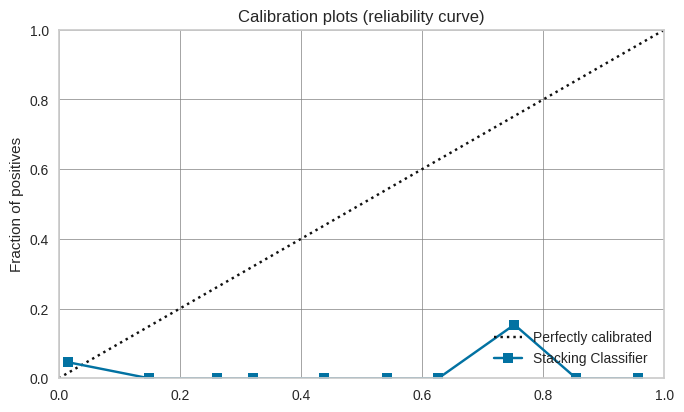

In [ ]:
plot_model(stacker, plot = 'calibration')

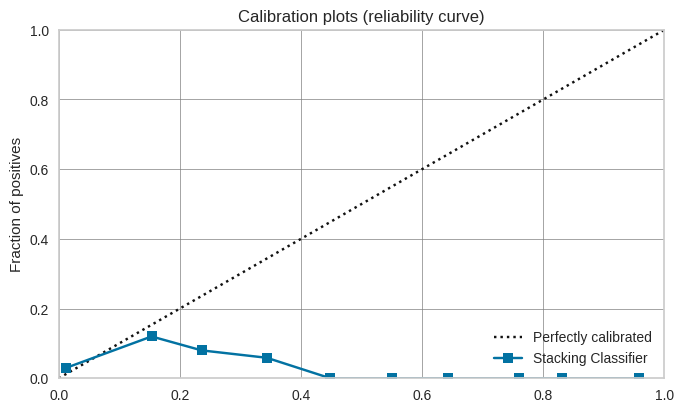

In [ ]:
plot_model(calibrated_model, plot = 'calibration')

In [ ]:
print(calibrated_model)

CalibratedClassifierCV(cv=5, ensemble=True,
                       estimator=StackingClassifier(cv=5,
                                                    estimators=[('Logistic '
                                                                 'Regression',
                                                                 LogisticRegression(C=1.0,
                                                                                    class_weight=None,
                                                                                    dual=False,
                                                                                    fit_intercept=True,
                                                                                    intercept_scaling=1,
                                                                                    l1_ratio=None,
                                                                                    max_iter=1000,
                                             

# **4. Analyze**

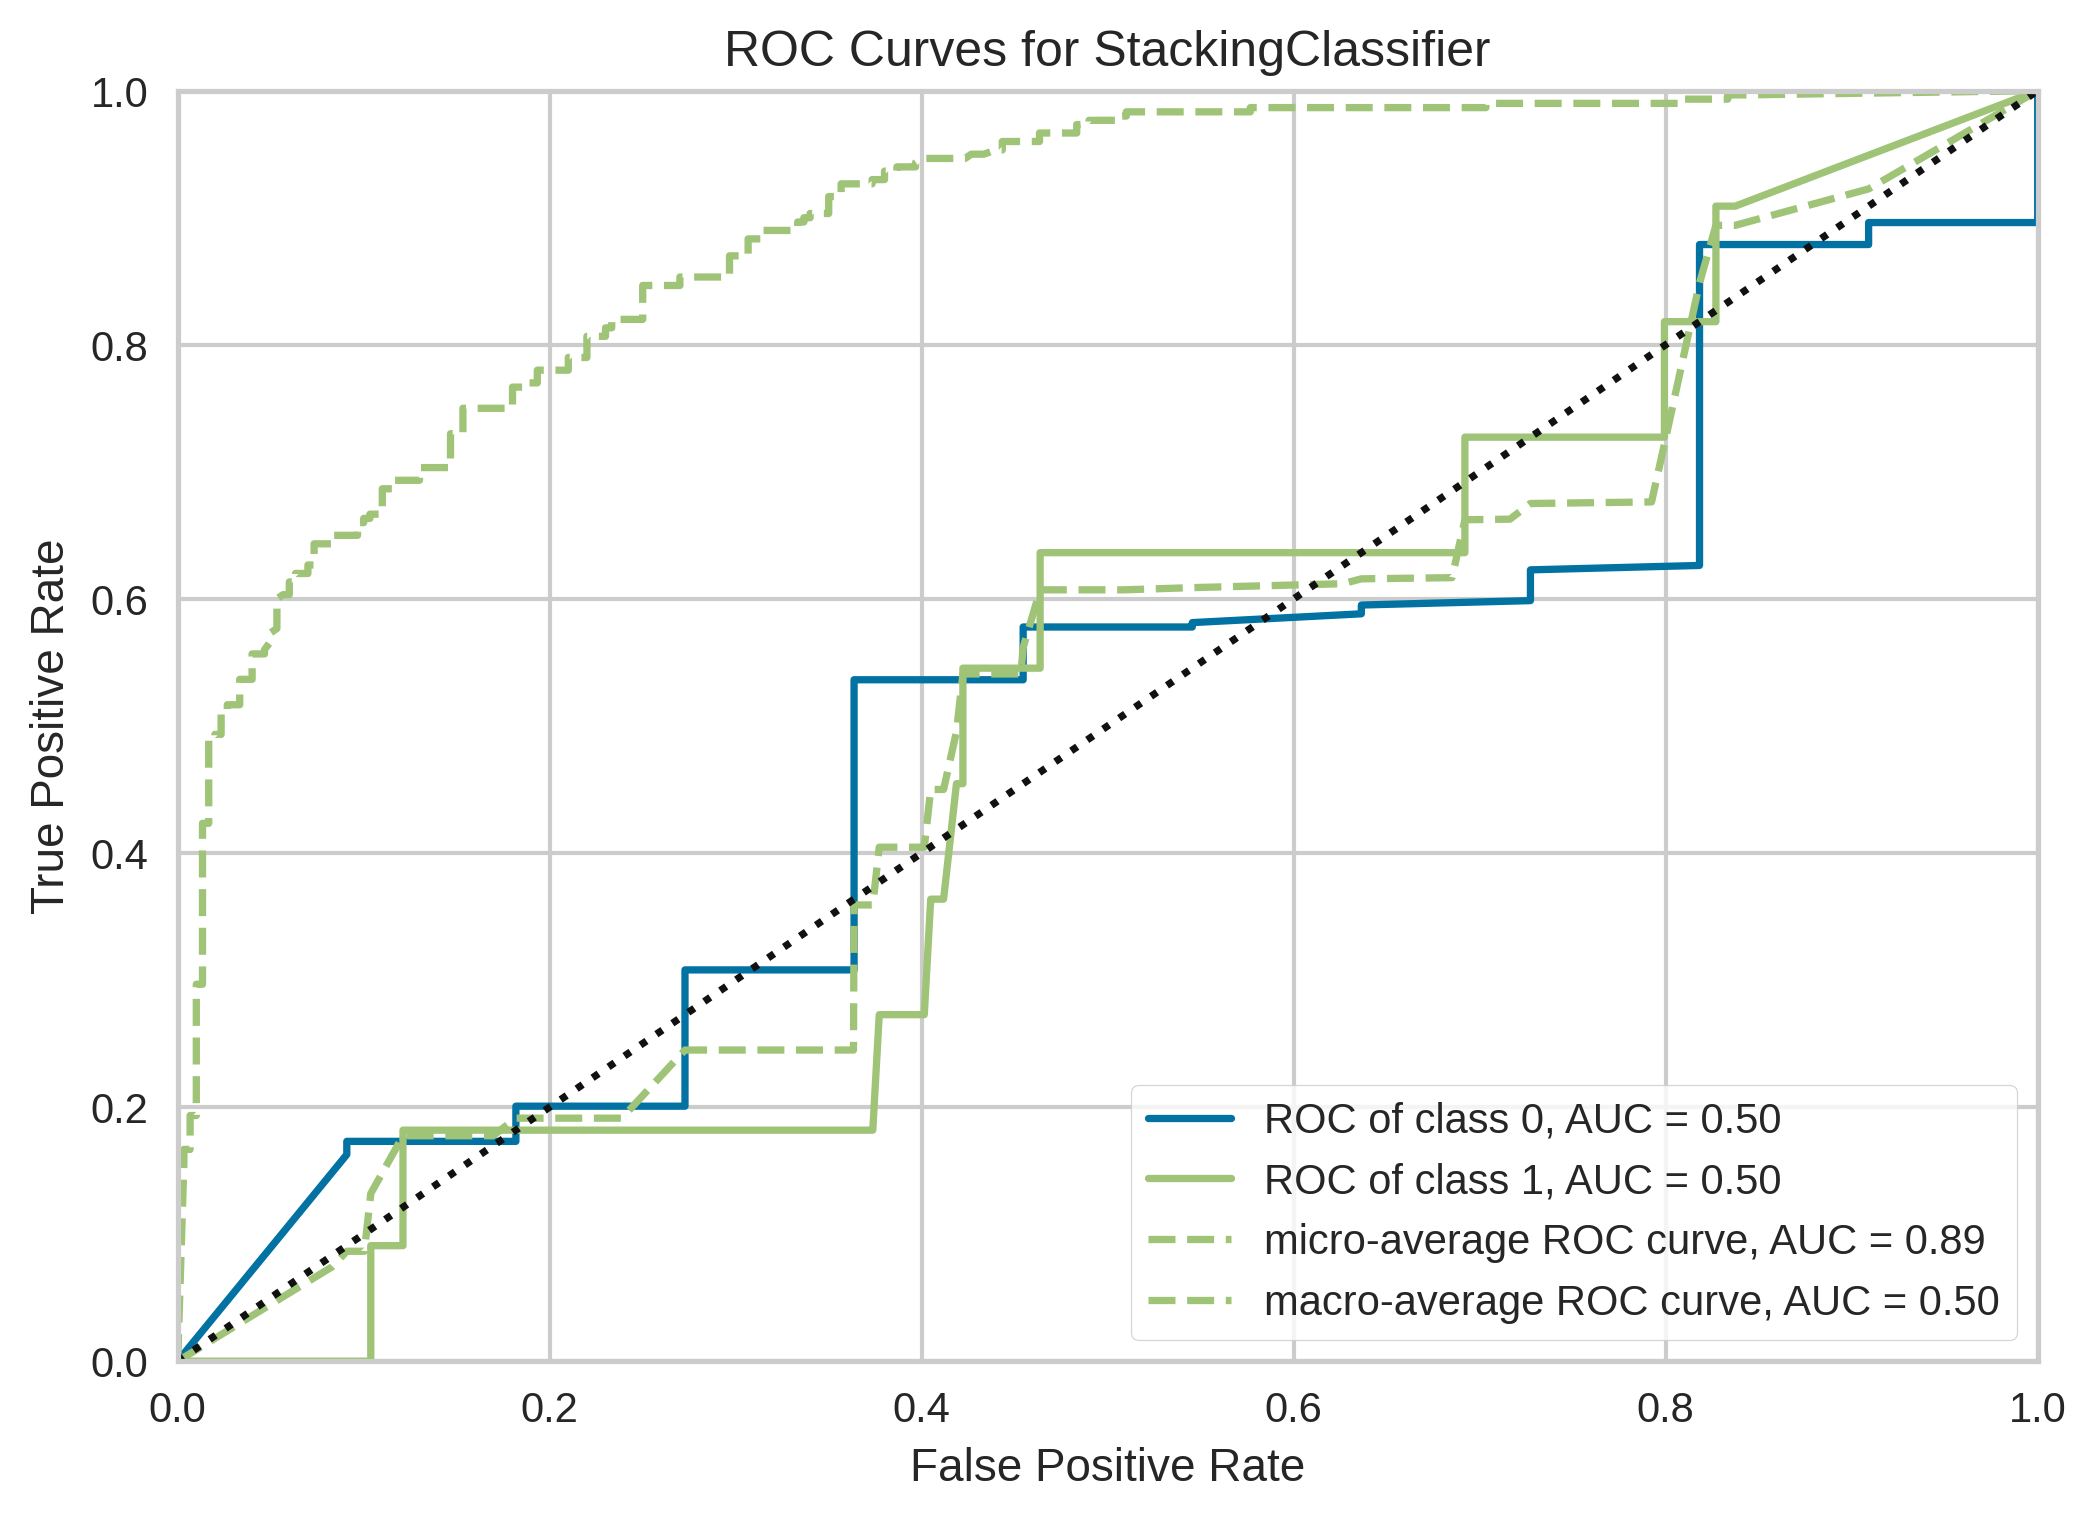

In [ ]:
# plot model
plot_model(stacker, plot = 'auc', scale = 3)

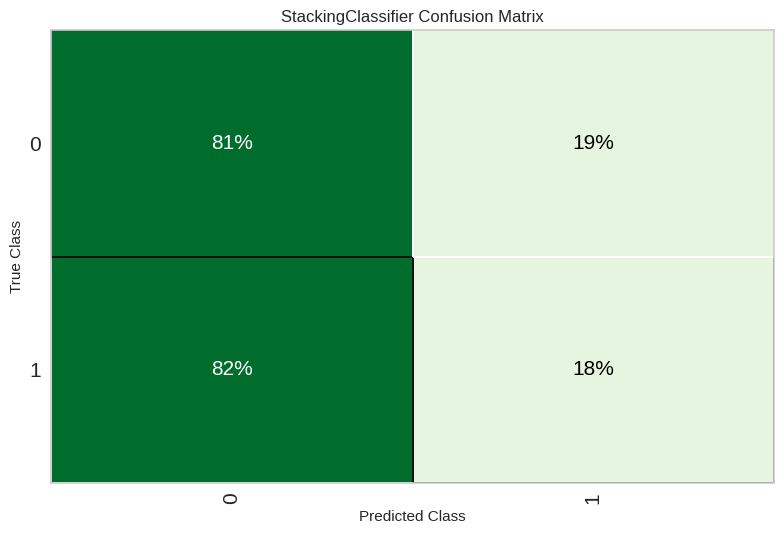

In [ ]:
# plot model
plot_model(stacker, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})

# **5. Evaluate_model**

In [ ]:
# launch evaluate widget
evaluate_model(stacker)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# **6. Interpret_model**

,Description,Value
0,Session id,1623
1,Target,Attribute20
2,Target type,Binary
3,Target mapping,"A201: 0, A202: 1"
4,Original data shape,"(1000, 20)"
5,Transformed data shape,"(1000, 59)"
6,Transformed train set shape,"(700, 59)"
7,Transformed test set shape,"(300, 59)"
8,Numeric features,7
9,Categorical features,12


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9857,0.8750,0.9857,0.9859,0.9834,0.6602,0.7020
1,0.9429,0.7868,0.9429,0.9429,0.9429,-0.0294,-0.0294
2,0.9714,0.5882,0.9714,0.9437,0.9573,0.0000,0.0000
3,0.9714,0.9265,0.9714,0.9437,0.9573,0.0000,0.0000
4,0.9571,0.9254,0.9571,0.9161,0.9362,0.0000,0.0000
5,0.9571,0.8259,0.9571,0.9161,0.9362,0.0000,0.0000
6,0.9571,0.8856,0.9571,0.9161,0.9362,0.0000,0.0000
7,0.9571,0.7015,0.9571,0.9504,0.9530,0.3787,0.3871
8,0.9429,0.7960,0.9429,0.9155,0.9290,-0.0219,-0.0255


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

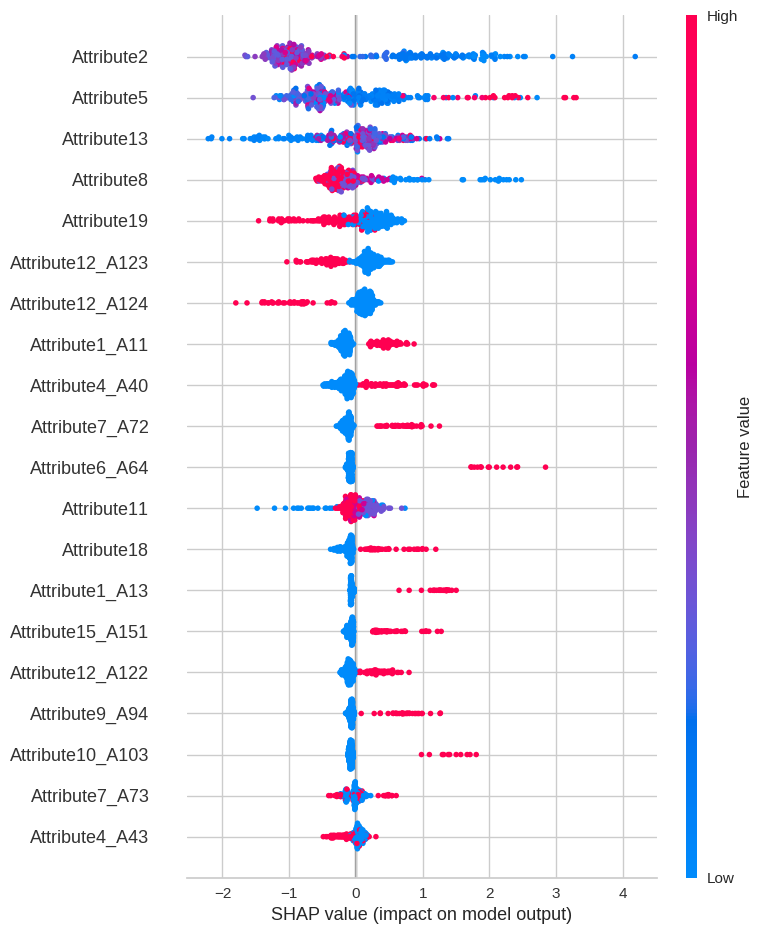

In [ ]:
clf = setup(X, target = y)
lgbm = create_model('lightgbm')
interpret_model(lgbm)


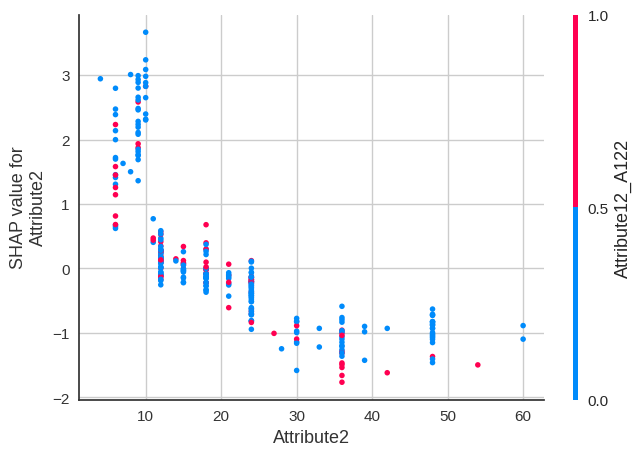

In [ ]:
# interpret model
interpret_model(lgbm, plot = 'correlation', feature = 'Attribute2')

**Partial Dependence Plot**

In [ ]:
# interpret model
interpret_model(lgbm, plot = 'pdp', feature = 'Attribute2')

In [ ]:
# interpret model
interpret_model(lgbm, plot = 'msa')

In [ ]:
# interpret model
interpret_model(lgbm, plot = 'pfi')

58it [00:00, 69.45it/s]


In [ ]:
# interpret model
interpret_model(lgbm, plot = 'reason')

In [ ]:

import shap
shap.initjs()


In [ ]:
# interpret model
interpret_model(lgbm, plot = 'reason', observation = 1)

# **7.Predict**

**7-1: Predict_model**

In [ ]:
# # predict on hold-out
predictions = predict_model(lgbm)



,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9667,0.6282,0.9667,0.9678,0.9531,0.1615,0.2964


**7-2: Finalize_model**

In [ ]:
# finalize a model
finalize_model(lgbm)

Pipeline(memory=Memory(location=None),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Attribute2', 'Attribute5',
                                             'Attribute8', 'Attribute11',
                                             'Attribute13', 'Attribute16',
                                             'Attribute18'],
                                    transformer=SimpleImputer(add_indicator=Fals...
                 LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.1, max_depth=-1,
                                min_child_samples=20, min_child_weight=0.001,
                                min_split_gain=0.0, n_estimators=100, n_jobs=-1,
                                num_leaves=31, objective=None,
                                random_state=1623, reg_alpha=0.0,
                                reg_lambda=0.0, subsample=1.0,
                                subsample_for_bin=200000, subsample_freq=0))],
         verbose=False)

# **8. Clustering**

**8-1: setup with OOP API**

In [ ]:
print(type(statlog_german_credit_data))

<class 'ucimlrepo.dotdict.dotdict'>


In [ ]:
from pycaret.clustering import ClusteringExperiment
cluster = ClusteringExperiment()
cluster.setup(X, normalize = True)

,Description,Value
0,Session id,7111
1,Original data shape,"(1000, 20)"
2,Transformed data shape,"(1000, 59)"
3,Numeric features,7
4,Categorical features,13
5,Preprocess,True
6,Imputation type,simple
7,Numeric imputation,mean
8,Categorical imputation,mode
9,Maximum one-hot encoding,-1


In [ ]:
# OOP API
kmeans = cluster.create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0503,41.3471,3.7004,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
print(kmeans)

KMeans(algorithm='lloyd', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init='auto', random_state=7111, tol=0.0001, verbose=0)


**8-2: Analyze Model**

In [ ]:
# OOP API
cluster.evaluate_model(kmeans)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

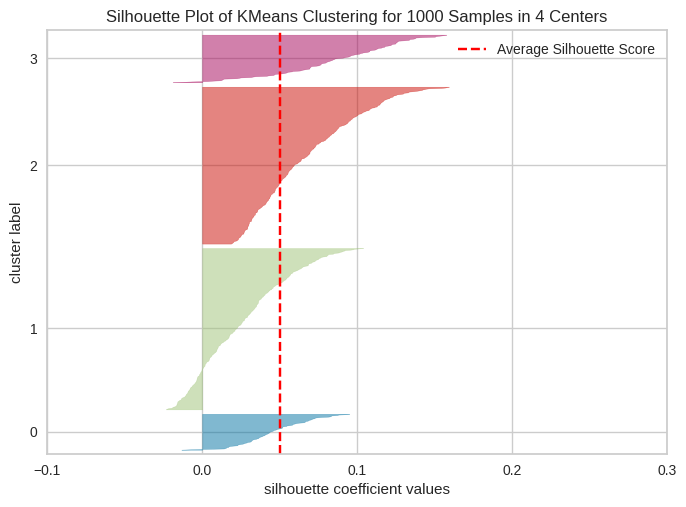

In [ ]:
# OOP API
cluster.plot_model(kmeans, plot = 'silhouette')

**8-3: Assign Model**

In [ ]:
result = cluster.assign_model(kmeans)
result.head()

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,...,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,Attribute20,Cluster
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,Cluster 1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,Cluster 2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,Cluster 1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,Cluster 0
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,Cluster 3


**8-4: Predictions**

In [ ]:
predictions = cluster.predict_model(kmeans, data = X)
predictions.head()

,Attribute1_A11,Attribute1_A12,Attribute1_A14,Attribute1_A13,Attribute2,Attribute3_A34,Attribute3_A32,Attribute3_A33,Attribute3_A30,Attribute3_A31,...,Attribute15_A151,Attribute16,Attribute17_A173,Attribute17_A172,Attribute17_A174,Attribute17_A171,Attribute18,Attribute19,Attribute20,Cluster
0,1.627770,-0.606621,-0.806328,-0.259299,-1.236478,1.553374,-1.061913,-0.31063,-0.204124,-0.226991,...,-0.466933,1.027079,0.766356,-0.5,-0.416784,-0.149983,-0.428290,1.214598,-0.196014,Cluster 1
1,-0.614337,1.648476,-0.806328,-0.259299,2.248194,-0.643760,0.941697,-0.31063,-0.204124,-0.226991,...,-0.466933,-0.704926,0.766356,-0.5,-0.416784,-0.149983,-0.428290,-0.823318,-0.196014,Cluster 2
2,-0.614337,-0.606621,1.240190,-0.259299,-0.738668,1.553374,-1.061913,-0.31063,-0.204124,-0.226991,...,-0.466933,-0.704926,-1.304877,2.0,-0.416784,-0.149983,2.334869,-0.823318,-0.196014,Cluster 1
3,1.627770,-0.606621,-0.806328,-0.259299,1.750384,-0.643760,0.941697,-0.31063,-0.204124,-0.226991,...,-0.466933,-0.704926,0.766356,-0.5,-0.416784,-0.149983,2.334869,-0.823318,-0.196014,Cluster 0
4,1.627770,-0.606621,-0.806328,-0.259299,0.256953,-0.643760,-1.061913,3.21926,-0.204124,-0.226991,...,-0.466933,1.027079,0.766356,-0.5,-0.416784,-0.149983,2.334869,-0.823318,-0.196014,Cluster 3


# **9. Anomaly Detection**

**9-1: Setup with Functional API**

In [ ]:
from pycaret.anomaly import *
anomaly = setup(X, session_id = 1234)

,Description,Value
0,Session id,1234
1,Original data shape,"(1000, 20)"
2,Transformed data shape,"(1000, 59)"
3,Numeric features,7
4,Categorical features,13
5,Preprocess,True
6,Imputation type,simple
7,Numeric imputation,mean
8,Categorical imputation,mode
9,Maximum one-hot encoding,-1


**9-2: Create Model**

In [ ]:
# functional API
iforest = create_model('iforest')
print(iforest)

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

IForest(behaviour='new', bootstrap=False, contamination=0.05,
    max_features=1.0, max_samples='auto', n_estimators=100, n_jobs=-1,
    random_state=1234, verbose=0)


In [ ]:
models()

,Name,Reference
ID,,
abod,Angle-base Outlier Detection,pyod.models.abod.ABOD
cluster,Clustering-Based Local Outlier,pycaret.internal.patches.pyod.CBLOFForceToDouble
cof,Connectivity-Based Local Outlier,pyod.models.cof.COF
iforest,Isolation Forest,pyod.models.iforest.IForest
histogram,Histogram-based Outlier Detection,pyod.models.hbos.HBOS
knn,K-Nearest Neighbors Detector,pyod.models.knn.KNN
lof,Local Outlier Factor,pyod.models.lof.LOF
svm,One-class SVM detector,pyod.models.ocsvm.OCSVM
pca,Principal Component Analysis,pyod.models.pca.PCA


**9-3: Analyze Model**

In [ ]:
# functional API
plot_model(iforest, plot = 'tsne')

In [ ]:
# functional API
plot_model(iforest, plot = 'umap')

**9-4: Assign Model**

In [ ]:
result = assign_model(iforest)
result.head()

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,...,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,Attribute20,Anomaly,Anomaly_Score
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,67,A143,A152,2,A173,1,A192,A201,0,-0.060174
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,22,A143,A152,1,A173,1,A191,A201,0,-0.105014
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,49,A143,A152,1,A172,2,A191,A201,0,-0.073043
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,45,A143,A153,1,A173,2,A191,A201,0,-0.032436
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,53,A143,A153,2,A173,2,A191,A201,0,-0.048203


**9-5: Predictions**

In [ ]:
predictions = predict_model(iforest, data = X)
predictions.head()

,Attribute1_A11,Attribute1_A12,Attribute1_A14,Attribute1_A13,Attribute2,Attribute3_A34,Attribute3_A32,Attribute3_A33,Attribute3_A30,Attribute3_A31,...,Attribute16,Attribute17_A173,Attribute17_A172,Attribute17_A174,Attribute17_A171,Attribute18,Attribute19,Attribute20,Anomaly,Anomaly_Score
0,1.0,0.0,0.0,0.0,6.0,1.0,0.0,0.0,0.0,0.0,...,2.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0,-0.060174
1,0.0,1.0,0.0,0.0,48.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0,-0.105014
2,0.0,0.0,1.0,0.0,12.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0,-0.073043
3,1.0,0.0,0.0,0.0,42.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0,-0.032436
4,1.0,0.0,0.0,0.0,24.0,0.0,0.0,1.0,0.0,0.0,...,2.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0,-0.048203


# **10. Save the model**

In [ ]:
save_model(iforest, 'iforest_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Attribute2', 'Attribute5',
                                              'Attribute8', 'Attribute11',
                                              'Attribute13', 'Attribute16',
                                              'Attribute18'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('categoric...
                                                         